## Predict number of bugs

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import xgboost as xgb

In [4]:
# read data from Excel file
df = pd.read_excel('completo.xlsx')
df.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
0,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.ClientTimeoutTest.testTim...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
1,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.spi.impl.ClusterListenerT...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108106 entries, 0 to 108105
Data columns (total 77 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Project                            108106 non-null  object
 1   Hash                               108106 non-null  object
 2   LongName                           108106 non-null  object
 3   CC                                 108106 non-null  int64 
 4   CCL                                108106 non-null  int64 
 5   CCO                                108106 non-null  int64 
 6   CI                                 108106 non-null  int64 
 7   CLC                                108106 non-null  int64 
 8   CLLC                               108106 non-null  int64 
 9   LDC                                108106 non-null  int64 
 10  LLDC                               108106 non-null  int64 
 11  HCPL                               108106 non-null  

In [6]:
print('Null Values: ',df.isnull().sum().sum())

Null Values:  0


In [7]:
df.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
count,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,...,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000,108106.000000
mean,48471.978086,0.695678,3.466329,2.089051,41014.045946,40928.270790,8.137791,7.305145,337863.506938,168387.192968,...,0.048286,0.012867,0.004107,0.123582,0.125562,0.160518,0.061514,0.000009,0.407332,0.308253
std,172427.409064,12.179035,109.661563,57.401812,154578.129958,154664.341447,155.248762,142.051142,255770.652303,243969.885943,...,0.241290,0.168219,0.069500,0.465318,1.103327,0.411296,1.461401,0.003041,0.696521,0.461774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138568.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,266828.000000,4644.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,487291.000000,267361.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,999746.000000,499.000000,20934.000000,2463.000000,999487.000000,999487.000000,6691.000000,5848.000000,999596.000000,999818.000000,...,8.000000,15.000000,3.000000,14.000000,88.000000,10.000000,79.000000,1.000000,6.000000,1.000000


In [8]:
df['Number of Bugs'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Number of Bugs, Length: 108106, dtype: int64>

In [9]:
# Check for Duplicates
print( 'duplicated Values: ', df.duplicated().sum())

duplicated Values:  105


In [10]:
# remove duplicate values
df = df.drop_duplicates()

In [11]:
print( 'duplicated Values: ', df.duplicated().sum())

duplicated Values:  0


In [12]:
# drop unwanted columns
df = df.drop(['Project', 'Hash', 'LongName'], axis=1)

In [13]:
df.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,1,1,0,1,1
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,1,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,1,0,1,0,0,1,1
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,1,0,0,1,1


In [14]:
df.shape

(108001, 74)

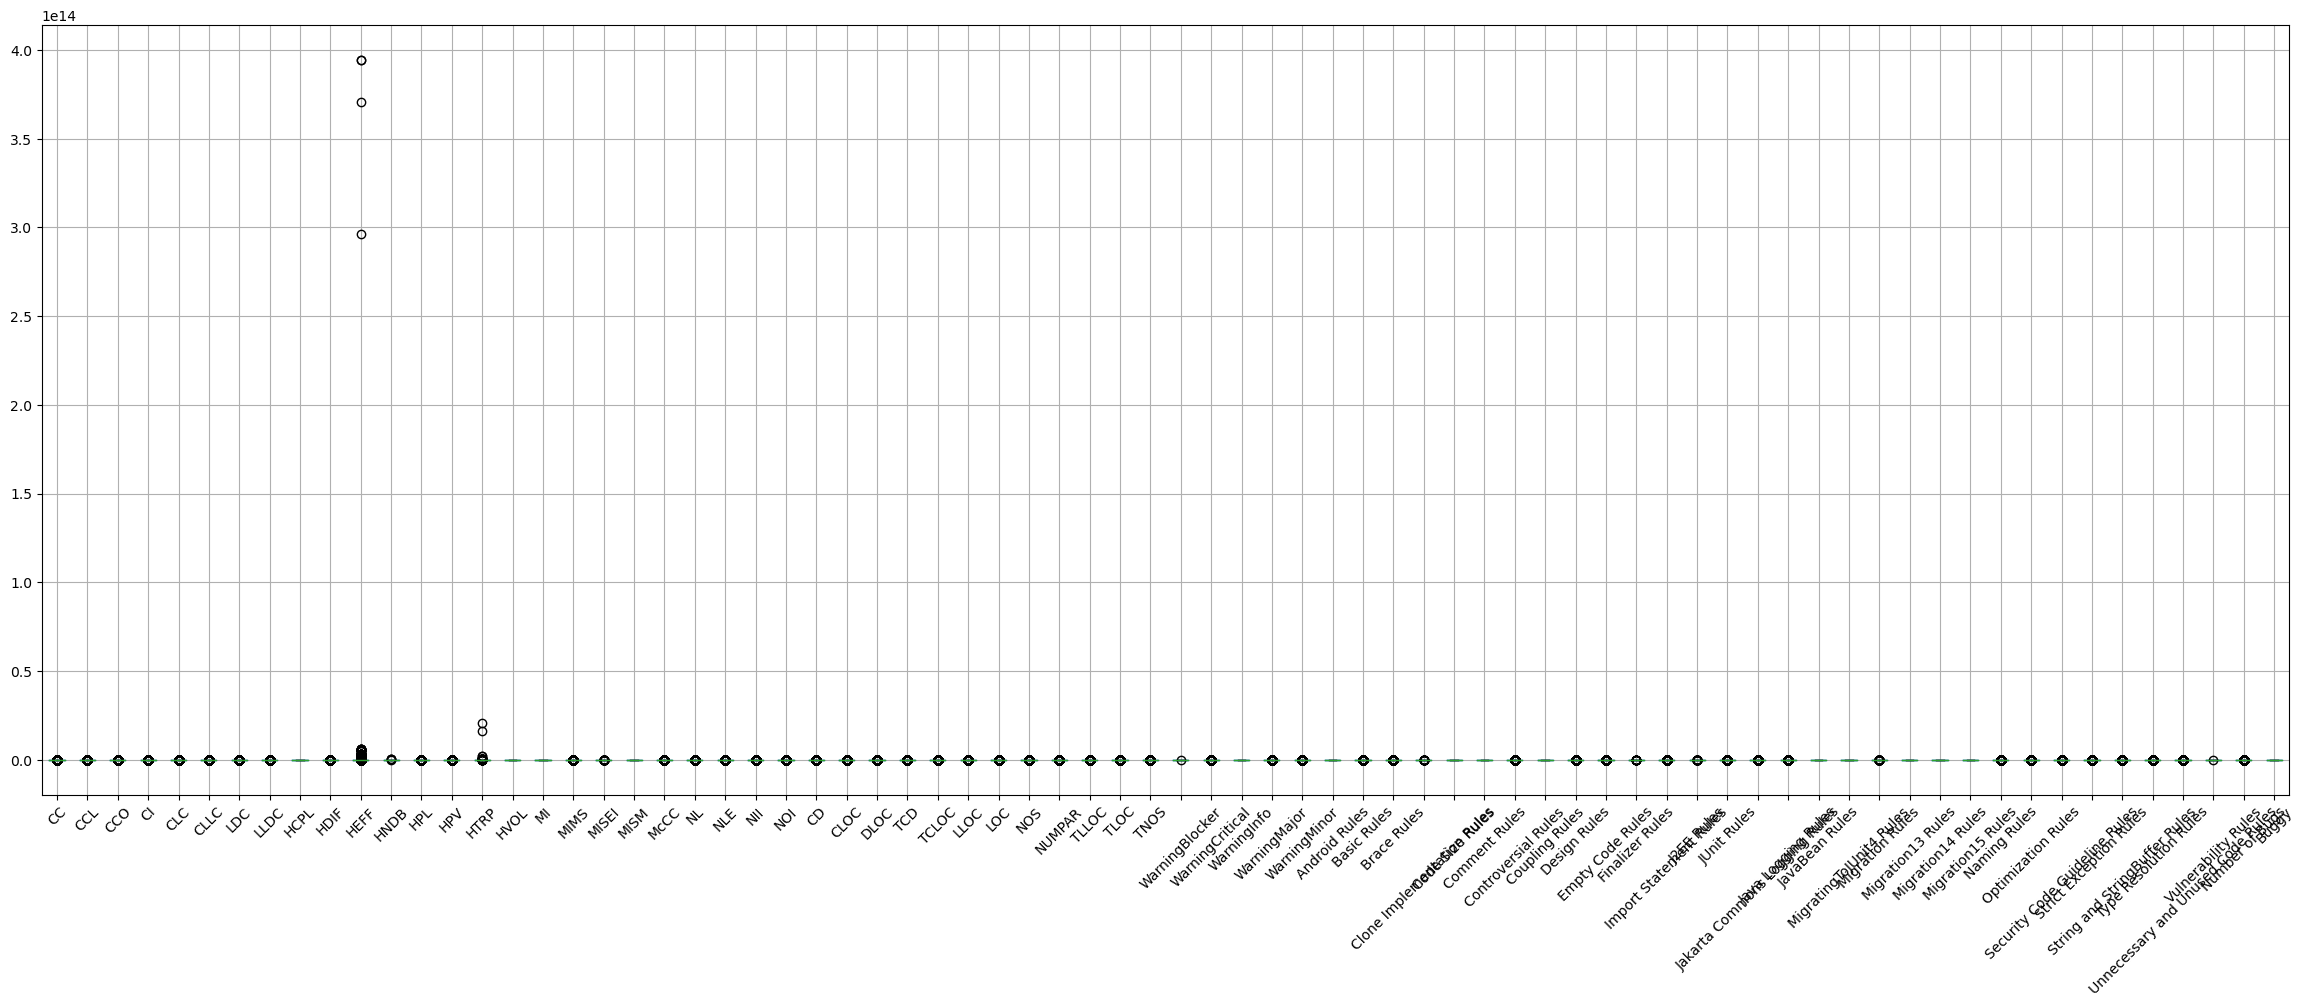

In [15]:
# handling outliers
# plot all columns in a boxplot
plt.figure(figsize=(29,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [16]:
# split the data into inputs and outputs
x = df.drop('Number of Bugs', axis=1)  # inputs/features
y = df['Number of Bugs']  # output/target variable

In [17]:
x

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Buggy
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108101,0,0,0,0,0,0,0,0,118039,33,...,0,0,0,0,0,0,0,0,0,0
108102,0,0,0,0,0,0,0,0,213303,308571,...,0,0,0,0,1,0,0,0,0,0
108103,0,0,0,0,0,0,0,0,247176,303947,...,0,0,0,0,1,0,0,0,0,0
108104,0,0,0,0,0,0,0,0,193219,368,...,0,0,0,0,1,0,0,0,0,0


In [18]:
y

0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Number of Bugs, Length: 108001, dtype: int64

In [19]:
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(df)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
#Before Excueting the random forest model we first need to make hyperparamter tuning
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb_model = XGBRegressor(random_state = 2022)

search_space = {
    "n_estimators": [100,300],
    "max_depth": [3,7],
    "min_samples_split": [25, 50],
    "max_features": [2,4]
}

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4)

GS.fit(X_train, y_train)

print(GS.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[14:57:49] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END max_depth=3, max_features=2, min_samples_split=25, n_estimators=100; neg_root_mean_squared_error: (test=-0.326) r2: (test=0.778) total time=  13.7s
[14:57:59] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] E

## Random Forest Classifier

In [22]:
# Create a random forest classifier with 300 trees
rf = RandomForestRegressor(n_estimators=300)

In [23]:
# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [24]:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)
# Evaluate your model
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2*(100))

R-squared score:  80.48946468938125


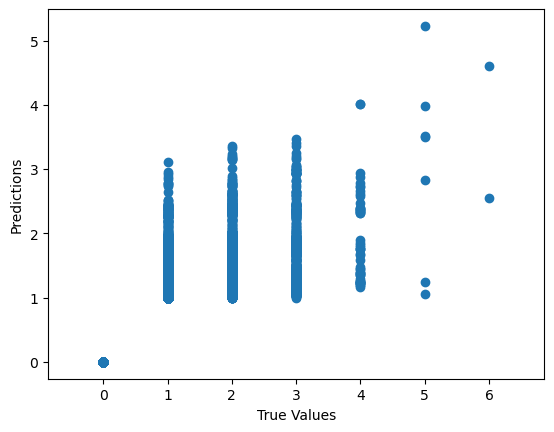

In [25]:
# calculate ROC curve
predictions = rf.predict(X_test)
plt.scatter(y_test,predictions )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

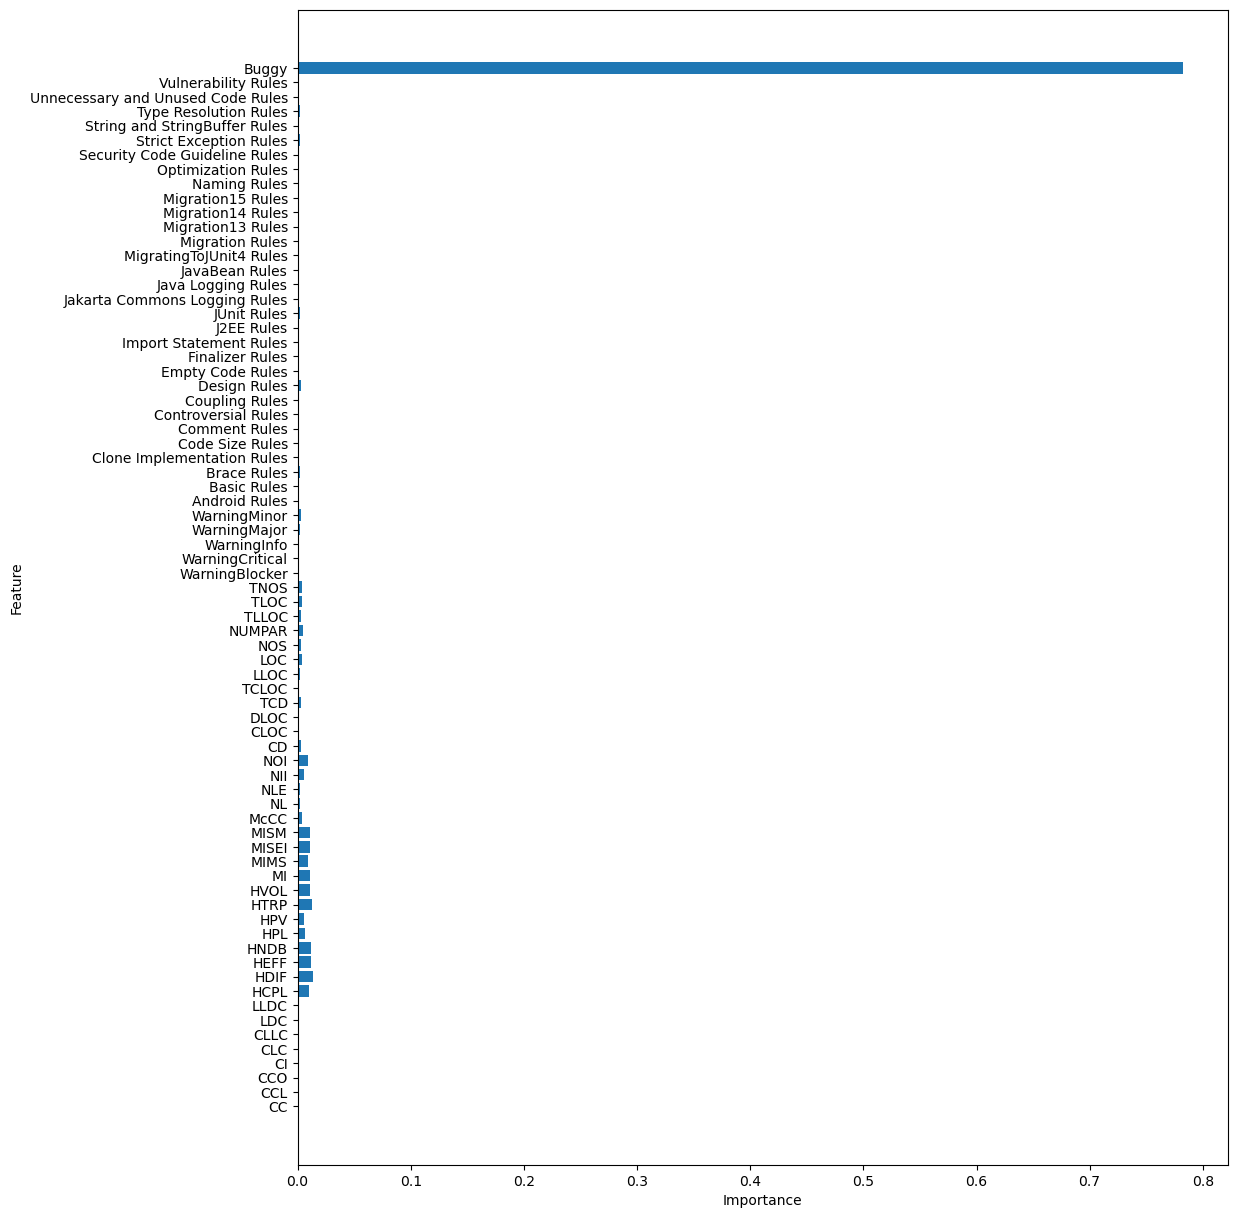

In [26]:
# plot feature importances
fig, ax = plt.subplots(figsize=(12,15))
ax.barh(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_yticks(range(len(X_train.columns)))
ax.set_yticklabels(X_train.columns)
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.show()

In [27]:
import shap
shap.initjs()
import joblib
explainer = shap.TreeExplainer(rf)

In [28]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   mode='regression')

In [29]:
exp = explainer.explain_instance(X_test.values[0], rf.predict, num_features=len(X_train.columns))

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [30]:
exp.show_in_notebook(show_table=True, show_all=False)

# XGBoost

In [31]:
# Define model
model = xgb.XGBClassifier()

# Train model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 92.25%


<AxesSubplot:>

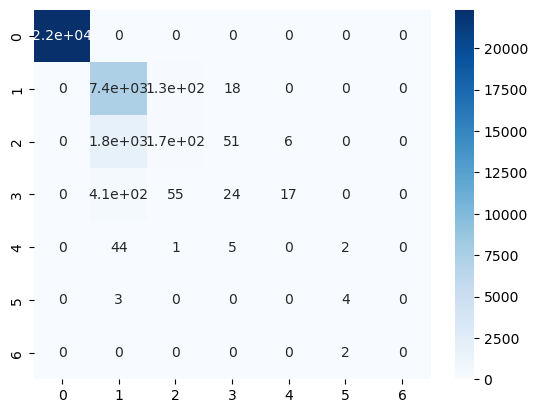

In [33]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

# XGBoost with GPU usage

In [34]:
# Define model
xgb_gpu = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# Train model
xgb_gpu.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [35]:
y_pred = xgb_gpu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 92.25%


<AxesSubplot:>

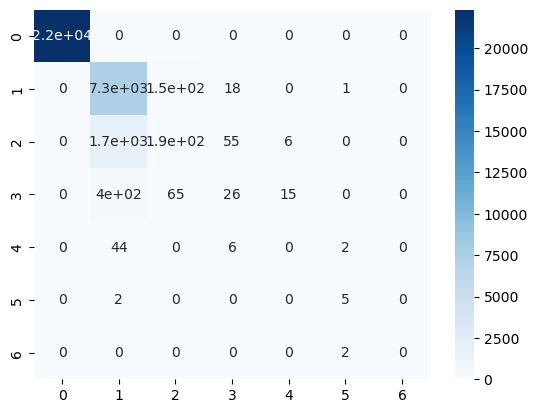

In [36]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")